**Random Forest Regression**

# Data Ingestion

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [6]:
df.duplicated().sum()

240

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
df.shape

(1359, 12)

# Model Selection

In [12]:
X = df.iloc[:, :-1]

In [13]:
y = df.iloc[:, -1]

# Decision Tree Classifier

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [16]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [17]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
model.score(X_train,y_train)

1.0

[Text(0.499945862206823, 0.9705882352941176, 'X[10] <= 10.15\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.23366704424307036, 0.9117647058823529, 'X[6] <= 62.5\ngini = 0.495\nsamples = 459\nvalue = [3, 15, 298, 131, 12, 0]'),
 Text(0.12631596481876334, 0.8529411764705882, 'X[1] <= 0.548\ngini = 0.571\nsamples = 282\nvalue = [3, 11, 151, 105, 12, 0]'),
 Text(0.06416577825159915, 0.7941176470588235, 'X[9] <= 0.585\ngini = 0.596\nsamples = 136\nvalue = [1, 4, 52, 68, 11, 0]'),
 Text(0.021321961620469083, 0.7352941176470589, 'X[7] <= 0.996\ngini = 0.512\nsamples = 44\nvalue = [0, 4, 28, 12, 0, 0]'),
 Text(0.008528784648187633, 0.6764705882352942, 'X[9] <= 0.435\ngini = 0.245\nsamples = 14\nvalue = [0, 2, 12, 0, 0, 0]'),
 Text(0.0042643923240938165, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.01279317697228145, 0.6176470588235294, 'X[6] <= 43.0\ngini = 0.142\nsamples = 13\nvalue = [0, 1, 12, 0, 0, 0]'),
 Text(0.0085287846

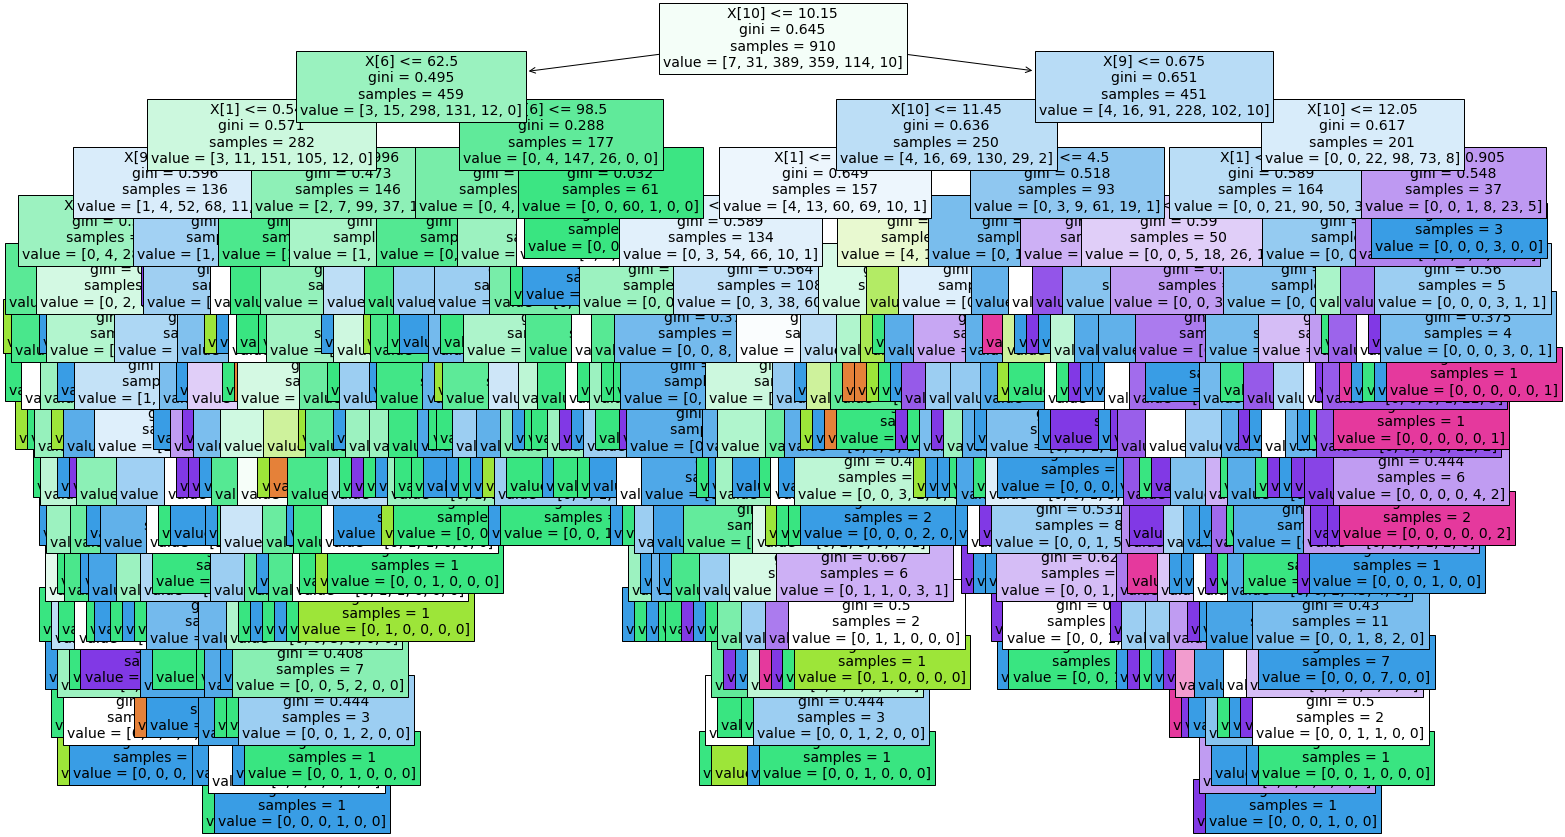

In [19]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model, filled=True, fontsize=14)

In [20]:
y_predict=model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

## Accuracy Score Decision Tree


In [22]:
accuracy_score(y_test,y_predict)

0.4766146993318486

In [23]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

In [24]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=3,verbose=1)

In [25]:
grid_searh.fit(X_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [26]:
grid_searh.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 7,
 'splitter': 'random'}

In [27]:
model_with_best_params=DecisionTreeClassifier(criterion= 'entropy',max_depth= 4,min_samples_leaf= 6,min_samples_split= 6,splitter='random')

In [28]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6,
                       min_samples_split=6, splitter='random')

[Text(0.5648148148148148, 0.9, 'X[10] <= 11.933\nentropy = 1.721\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.2962962962962963, 0.7, 'X[1] <= 0.409\nentropy = 1.643\nsamples = 811\nvalue = [7, 30, 381, 312, 76, 5]'),
 Text(0.14814814814814814, 0.5, 'X[10] <= 10.908\nentropy = 1.688\nsamples = 216\nvalue = [0, 3, 61, 103, 45, 4]'),
 Text(0.07407407407407407, 0.3, 'X[9] <= 0.64\nentropy = 1.543\nsamples = 147\nvalue = [0, 2, 52, 70, 23, 0]'),
 Text(0.037037037037037035, 0.1, 'entropy = 1.199\nsamples = 62\nvalue = [0, 1, 33, 27, 1, 0]'),
 Text(0.1111111111111111, 0.1, 'entropy = 1.561\nsamples = 85\nvalue = [0, 1, 19, 43, 22, 0]'),
 Text(0.2222222222222222, 0.3, 'X[6] <= 56.493\nentropy = 1.745\nsamples = 69\nvalue = [0, 1, 9, 33, 22, 4]'),
 Text(0.18518518518518517, 0.1, 'entropy = 1.575\nsamples = 56\nvalue = [0, 0, 5, 27, 21, 3]'),
 Text(0.25925925925925924, 0.1, 'entropy = 1.892\nsamples = 13\nvalue = [0, 1, 4, 6, 1, 1]'),
 Text(0.4444444444444444, 0.5, 'X[6] <= 107.

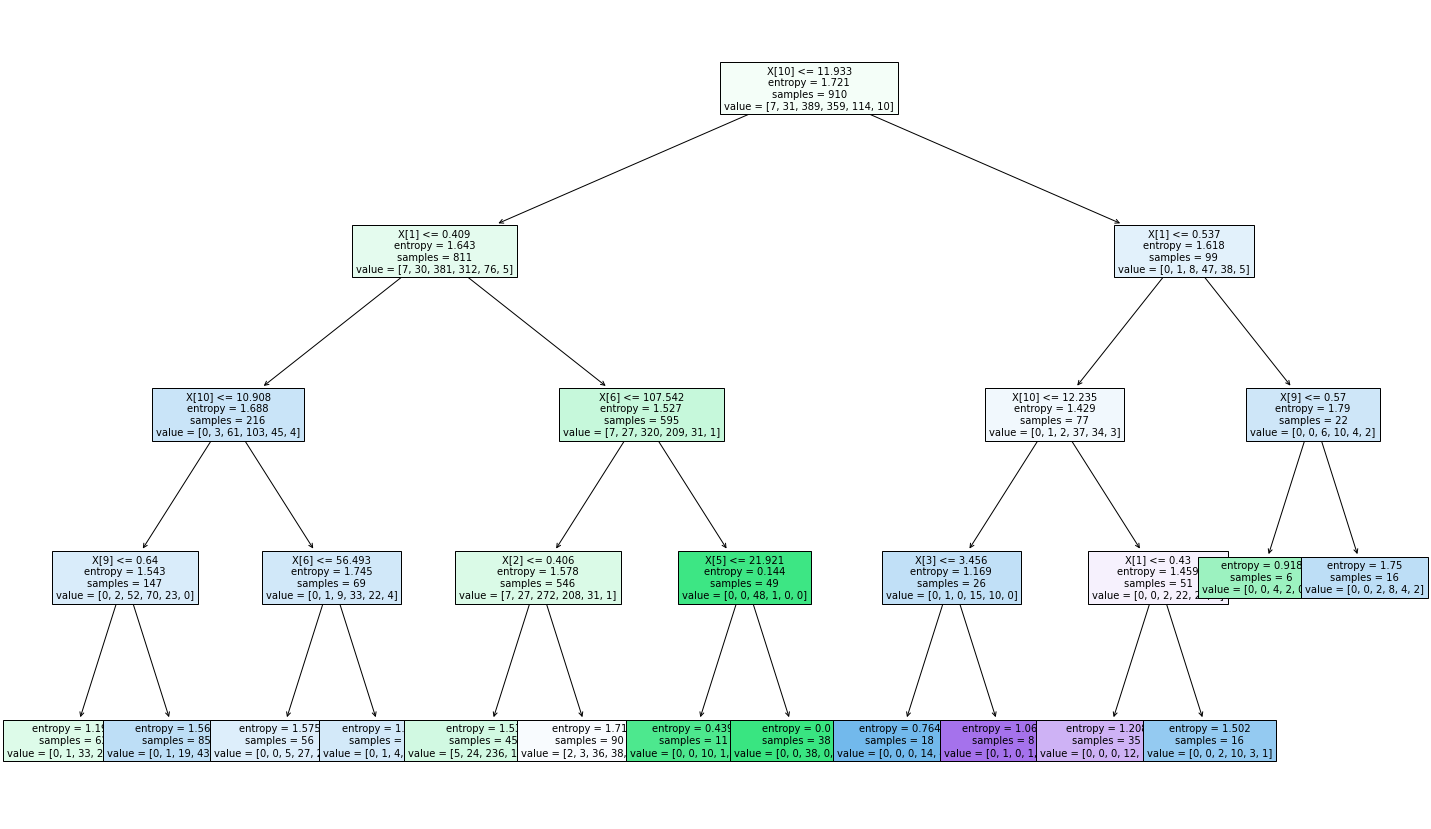

In [29]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [30]:
y_prediction2=model_with_best_params.predict(X_test)

## Accuracy Score - Decision Tree Hyperparameter tuning

In [31]:
accuracy_score(y_test,y_prediction2)

0.5011135857461024

# Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_model = RandomForestClassifier()

In [34]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_predict_rf = rf_model.predict(X_test)

In [36]:
accuracy_score(y_test, y_predict_rf)

0.6013363028953229

# Hyperparameter Tuning - Random Forest Classifier

In [37]:
# TIME COMPLEXICITY: No of estimator * depth

In [77]:
# (criterion= 'entropy',max_depth= 4,min_samples_leaf= 6,min_samples_split= 6,splitter='random')
grid_param = {
    "n_estimators" : [120, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(26, 30, 1),
    'min_samples_leaf' : range(95, 100, 1),
    'min_samples_split': range(95, 100, 1),
    'max_features' : ['log2']
}

In [78]:
best_parameters_grid = GridSearchCV(estimator=rf_model, param_grid=grid_param, cv=3, n_jobs=-1)

In [79]:
best_parameters_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(26, 30), 'max_features': ['log2'],
                         'min_samples_leaf': range(95, 100),
                         'min_samples_split': range(95, 100),
                         'n_estimators': [120, 150, 200]})

In [80]:
best_parameters_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 26,
 'max_features': 'log2',
 'min_samples_leaf': 95,
 'min_samples_split': 96,
 'n_estimators': 120}

In [81]:
rf_model_best_parameters_grid = RandomForestClassifier(
    criterion = 'entropy',
    max_depth = 26,
    max_features = 'log2',
    min_samples_leaf = 95,
    min_samples_split= 96,
    n_estimators = 120
)

In [82]:
rf_model_best_parameters_grid.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', max_depth=26, max_features='log2',
                       min_samples_leaf=95, min_samples_split=96,
                       n_estimators=120)

In [83]:
y_predict_rf_best_params = rf_model_best_parameters_grid.predict(X_test)

## Accuracy score

In [84]:
accuracy_score(y_test, y_predict_rf_best_params)

0.5501113585746102

# Bagging Model

In [41]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [42]:
model_bagging_svc = BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=0)
model_bagging_svc.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=0)

In [43]:
y_predict_bagging=model_bagging_svc.predict(X_test)

In [45]:
accuracy_score(y_test,y_predict_bagging)

0.4766146993318486

**=========THE END=========**